1. [Light Gradient Boosting - Classification](#light-gradient-boosting---classification)

#### Light Gradient Boosting - Classification:
- used to handle complex dataset when there isnt sufficient processing power
- performs 5 important things
    - gradient based one side sampling
    - histogram binning
        - bins numerical values into selected bins using weighted quantiles sketches and parallel learning
    - exclusive feature bundling
        - combining features to overcome curse of dimensionality
    - leaf-wise tree growth
        - splitting of the node based on the largest loss reduction
    - parallel processing and GPU learning

- now lets consider a classification problem for LGB along with the dataset below

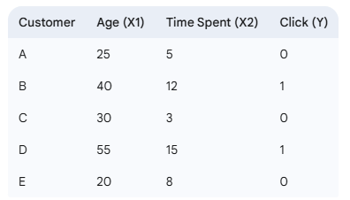

In [3]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/data_class.png')
new_image = img.resize((350, 200))
display(new_image)

- now, we initially presume the initial probability to be 0.5 or take the probability of Y=1 (true class)
    - when we take the log(odds) = −0.405
        - log(p)/(1-p)
            - p = 2/5
            - 1-p = 3/5
- we convert the log of odds into probability

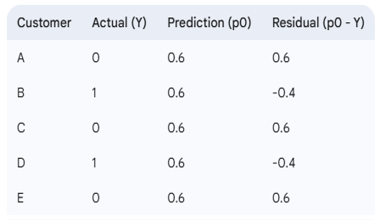

In [6]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/residual.png')
new_image = img.resize((380, 220))
display(new_image)

- now train the tree using input features and the residuals
- however, before training we perform the below steps
    - Histogram binning for splitting the node:
        - instead of finding the best split for numerical feature by calculating the average of adjacent records and calculating the gini index or RSS or entropy
    - Exclusive feature bunding:
        - it combines two features into one thereby reducing the number of feature and eliminating the curse of dimensionality
        - eg: Male & Female features with separate columnn is combined into 1 feature with column name as gender
    - Gradient one side sampling:
        - chooses data points with larger gradient (20% of data points from the whole dataset) and also randomly selects a fewer sample data points with lower gradients too (from the remaining 80% of data points we choose 10% of data points randomly)

- while building the tree,
    - leaf-wise tree growth:
        - use the leaf which has largest loss reduction to split further
        - the growth can be controlled via num_of_leaves and max_depth parameters
- after building the tree, we make the prediction
    - prediction = base learner prediction + α * leaf output (residuals)

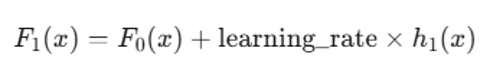

In [7]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/pred.png')
new_image = img.resize((490, 70))
display(new_image)

From the table below,
- h1(x) = the leaf output of one weak learner (tree)
- F1 = log(odds) value of prediction
- p1 = probability value of F1
- now a new residual to calculated 
    - Observed - latest prediction 

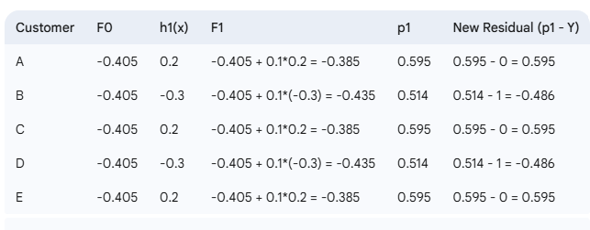

In [8]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/table_class.png')
new_image = img.resize((590, 230))
display(new_image)

- performs parallel processing and GPU learning
- we repeat the steps until the desired number of tree mentioned is built